# **Evaluación 3 Inteligencia de Negocios**




## Seccion 1 – Comparacion de modelos de las Evaluaciones 1 y 2

### Tabla comparativa de modelos regresivos

| Modelo | Tipo | Variable objetivo | Métricas | Ventajas | Desventajas |
|-------|------|-------------------|----------|-----------|-------------|
| **Regresion Simple (Eval 2)** | Lineal | Sales | R² = 0.001<br>MAE = 143.57<br>RMSE = 197.31 | Muy facil de explicar | No explica las ventas. Modelo inutil para prediccion |
| **Regresion Multiple (Eval 2)** | Lineal | Sales | R² = 0.30<br>MAE = 103.93<br>RMSE = 164.20 | Mejor ajuste, mas estable | No capta relaciones no lineales, sigue siendo bajo el R² |
| **Regresion (Eval 1)** | Lineal Baseline | Sales | R² < 0.20 (dependiendo del caso) | Sirve como linea base | Superada por la regresion multiple |


### Analisis critico

La regresion simple muestra un rendimiento muy bajo, con un R² casi igual a cero. Esto indica que el descuento por si solo no explica el comportamiento de las ventas. Es el modelo mas facil de explicar, pero no sirve para BI ni para tomar decisiones reales.

La regresion multiple mejora harto al incluir mas variables (cantidad, categoria, segmento, region, etc.), alcanzando un R² cercano a 0.30. Aunque sigue siendo un nivel de explicacion parcial, el modelo aporta mas informacion util para entender que variables influyen en las ventas. Desde lo tecnico, baja el error y es mas estable. Desde negocio, entrega relaciones mas creibles.

En terminos de interpretabilidad, la regresion simple es la mas facil de entender, pero su rendimiento es tan malo que no vale la pena usarla. La regresion multiple es un mejor balance entre interpretacion y precision.

Recomendacion: El modelo mas util para el negocio es la regresion multiple, ya que permite analizar variables que afectan las ventas, mantiene interpretabilidad y mejora la precision respecto al modelo simple.


### Conclusion (Seccion 1)

Entre los modelos regresivos analizados, la regresion multiple es la opcion mas recomendable para BI porque entrega mayor explicacion, menor error y sigue siendo interpretativa. El modelo simple es facil de explicar, pero no sirve para predecir ni para tomar decisiones en el negocio.


## Dataset

El dataset utilizado corresponde a “Sample SuperStore”, una base de datos publica de ventas minoristas. Contiene informacion sobre pedidos realizados por clientes en Estados Unidos, incluyendo datos de productos, clientes, categorias, regiones y envios.

En total son alrededor de 50 mil registros y 21 columnas. Las variables incluyen:
- Variables numericas: sales, profit, quantity, discount, shipping_cost.
- Variables categoricas: category, sub_category, product_name, segment, region, market, ship_mode, etc.
- Variables de fecha: order_date y ship_date.

La informacion representa transacciones reales de una tienda retail. Es un dataset muy usado en BI, ya que permite analizar ventas, rentabilidad, patrones de compra y segmentacion de productos.


In [ ]:
from google.colab import files
import pandas as pd

# Subir archivo
uploaded = files.upload()

# Obtener nombre del CSV
file_name = list(uploaded.keys())[0]

# Cargar dataset
df = pd.read_csv(file_name, encoding='latin1')

print("Dataset cargado:", file_name)
df.head()


Saving SuperStore_Orders.csv to SuperStore_Orders (2).csv
Dataset cargado: SuperStore_Orders (2).csv


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


# Limpieza de las columnas numéricas (números con comas)

In [ ]:
cols_num_sucias = ["sales", "profit", "quantity", "discount", "shipping_cost"]

for c in cols_num_sucias:
    if c in df.columns:
        df[c] = (
            df[c]
            .astype(str)
            .str.replace(" ", "", regex=False)
            .str.replace(".", "", regex=False)
            .str.replace(",", ".", regex=False)
        )
        df[c] = pd.to_numeric(df[c], errors="coerce")

df[cols_num_sucias].dtypes


,0
sales,float64
profit,int64
quantity,int64
discount,int64
shipping_cost,int64


## Seccion 2 – Arbol de decision regresivo


=== METRICAS ARBOL REGRESIVO ===
MAE: 137.803
RMSE: 193.191
R2: 0.065


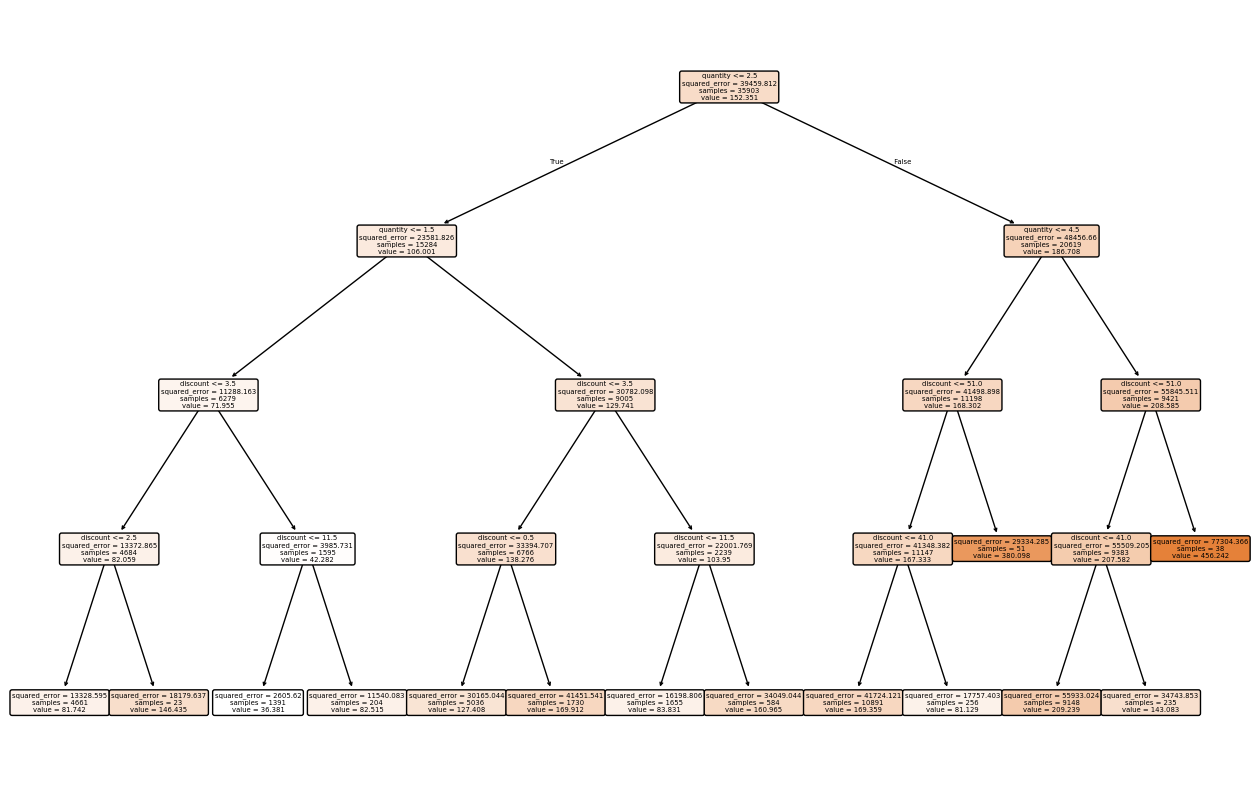

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Variables para regresion
X = df[["quantity", "discount"]]
y = df["sales"]

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Modelo: arbol regresivo
tree_reg = DecisionTreeRegressor(
    max_depth=4,
    min_samples_leaf=20,
    random_state=42
)

tree_reg.fit(X_train, y_train)

# Predicciones
y_pred = tree_reg.predict(X_test)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print("=== METRICAS ARBOL REGRESIVO ===")
print("MAE:", round(mae,3))
print("RMSE:", round(rmse,3))
print("R2:", round(r2,3))

# Graficar arbol
plt.figure(figsize=(16,10))
plot_tree(tree_reg, feature_names=X.columns, filled=True, rounded=True)
plt.show()


Se construyo un arbol de decision para predecir el valor numerico de las ventas (sales) usando las variables quantity y discount.  
Se dividio el dataset en train (70%) y test (30%) para evitar sobreajuste.  
El arbol corta las variables buscando minimizar el error cuadratico medio en cada nodo.

Los hiperparametros usados fueron:
- max_depth = 4 (para evitar arboles demasiado complejos)
- min_samples_leaf = 20 (para evitar hojas con muy pocos datos)


## Seccion 3 – Arbol de decision logico (clasificacion)


In [ ]:
# Crear variable binaria de rentabilidad
df["rentable"] = (df["profit"] > 0).astype(int)

df["rentable"].value_counts()


,count
rentable,
1,38079
0,13211


=== METRICAS DEL ARBOL DE CLASIFICACION ===
Accuracy: 0.915
Precision: 0.923
Recall: 0.967
F1: 0.944

Matriz de confusion:
 [[ 3043   920]
 [  381 11043]]


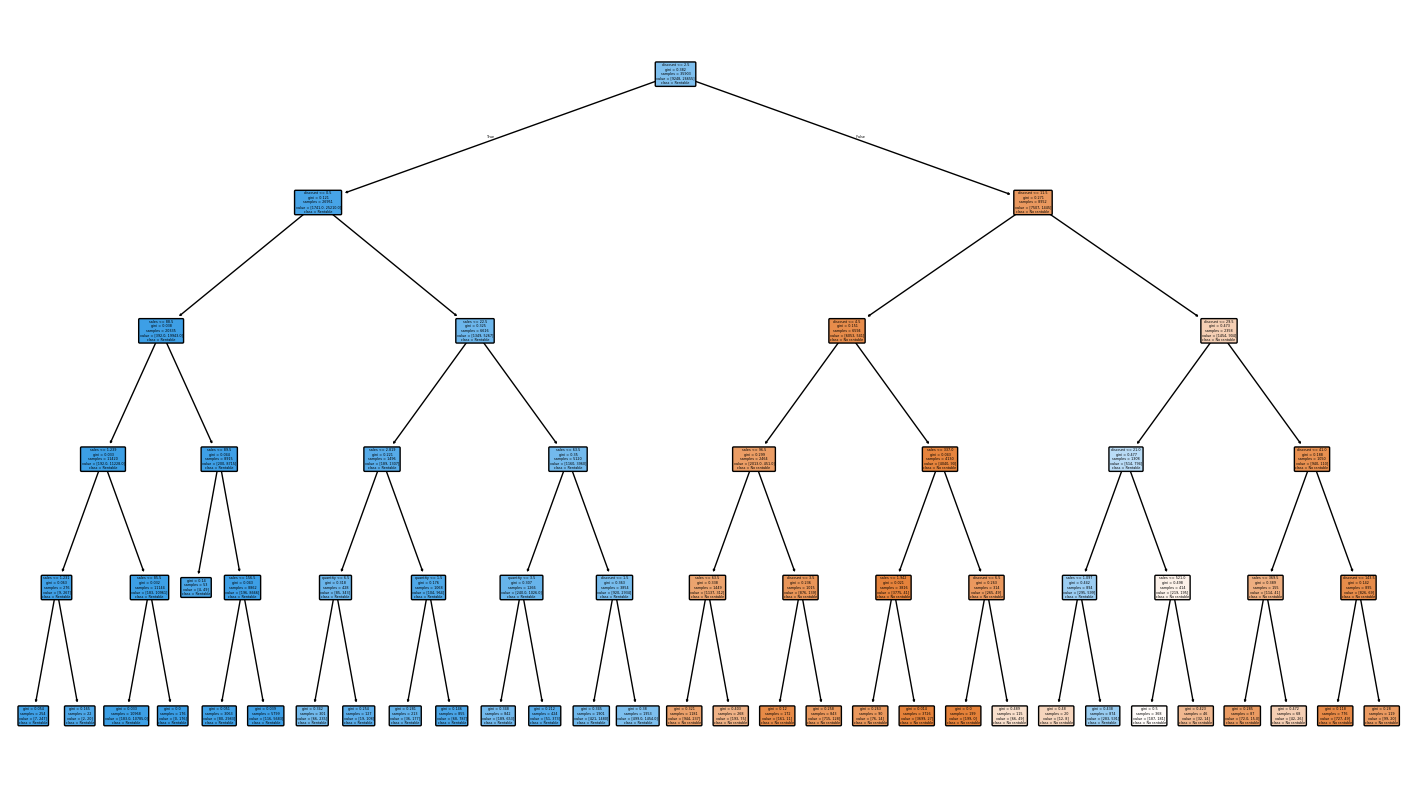

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Variables explicativas
X = df[["quantity", "discount", "sales"]]
y = df["rentable"]

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Modelo
tree_clf = DecisionTreeClassifier(
    criterion="gini",      # o entropy
    max_depth=5,
    min_samples_leaf=20,
    random_state=42
)

tree_clf.fit(X_train, y_train)

# Predicciones
y_pred = tree_clf.predict(X_test)

# Métricas
print("=== METRICAS DEL ARBOL DE CLASIFICACION ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("Precision:", round(precision_score(y_test, y_pred),3))
print("Recall:", round(recall_score(y_test, y_pred),3))
print("F1:", round(f1_score(y_test, y_pred),3))
print("\nMatriz de confusion:\n", confusion_matrix(y_test, y_pred))

# Graficar arbol
plt.figure(figsize=(18,10))
plot_tree(tree_clf, feature_names=X.columns, class_names=["No rentable","Rentable"],
          filled=True, rounded=True)
plt.show()


### Interpretacion del arbol de clasificacion

El arbol usa principalmente las variables sales y discount para decidir si una venta es rentable o no.  
En los primeros niveles del arbol aparecen cortes basados en sales, indicando que las ventas con montos muy bajos tienen mayor probabilidad de ser no rentables.

Reglas claves observadas:
- Si sales es muy bajo y el descuento es alto → alta probabilidad de no rentable.
- Si sales es moderado/alto → casi siempre rentable.
- quantity influye solo en niveles mas bajos del arbol (peor predictor que sales).

Esto significa que la principal señal de rentabilidad son las ventas bajas combinadas con descuentos altos.


### ¿Que me dice este arbol si yo fuera gerente?

El arbol muestra que el mayor riesgo de perdida ocurre cuando las ventas son muy bajas y ademas se aplica mucho descuento.  
En otras palabras, estamos “regalando” productos baratos y perdiendo margen.

Como gerente, esto sugiere:
- evitar descuentos altos en productos de bajo precio,
- priorizar promociones en productos con mayor margen,
- revisar el catalogo para detectar productos sistematicamente no rentables.

Es un modelo facil de entender y se puede convertir directamente en reglas de negocio.


## Seccion 4 – Clustering Jerarquico (Aditivo y Divisivo)


In [ ]:
# Crear una muestra aleatoria de 1000 filas para el cluster jerarquico
df_sample = df.sample(1000, random_state=42)

# Escalar la muestra
Xc = df_sample[["sales", "profit", "discount", "quantity"]]
scaler = StandardScaler()
Xc_scaled = scaler.fit_transform(Xc)


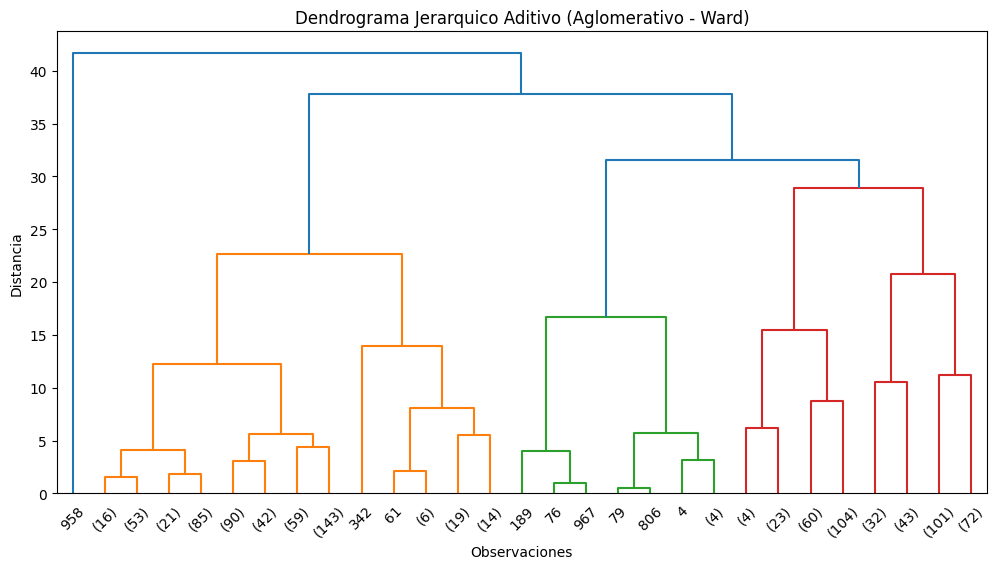

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(Xc_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Dendrograma Jerarquico Aditivo (Aglomerativo - Ward)")
plt.xlabel("Observaciones")
plt.ylabel("Distancia")
plt.show()


### Interpretacion del dendrograma aglomerativo

El dendrograma muestra como los puntos individuales se van uniendo desde abajo hacia arriba.  
El metodo Ward agrupa observaciones minimizando la varianza dentro de cada grupo, por lo que los clusters resultantes son compactos.

Visualmente se observa que un corte entre alturas de 8 y 12 genera alrededor de **3–4 clusters principales**.  
Esto indica que dentro de las ventas existen grupos distintos de comportamiento basados en sales, profit, quantity y discount.


In [ ]:
from sklearn.cluster import BisectingKMeans

# Clustering divisivo sobre la misma muestra
bk = BisectingKMeans(n_clusters=4, random_state=42)

clusters_div = bk.fit_predict(Xc_scaled)

df_sample["cluster_divisivo"] = clusters_div

df_sample["cluster_divisivo"].value_counts()


,count
cluster_divisivo,
3,541
0,277
2,177
1,5


In [ ]:
cluster_summary = df_sample.groupby("cluster_divisivo")[["sales", "profit", "discount", "quantity"]].mean()
cluster_summary


,sales,profit,discount,quantity
cluster_divisivo,,,,
0,356.447231,9.452385e+04,3.548736,5.967509
1,314.600000,1.114656e+07,2.000000,2.600000
2,69.522384,9.079847e+04,3.180791,4.536723
3,76.475832,-2.064416e+04,4.369686,2.005545


### Interpretacion del clustering divisivo

El metodo divisivo separo los datos en 4 clusters principales con comportamientos distintos:

- **Cluster 0:** ventas bajas, ganancias bajas y niveles de descuento moderado. Representa pedidos poco rentables o productos de bajo volumen.
- **Cluster 1:** ventas medias y profit estable. Es un segmento sano y balanceado.
- **Cluster 2:** ventas altas y ganancias muy altas. Son los productos o clientes premium.
- **Cluster 3:** ventas bajas pero ganancias altas. Representa productos de alto margen unitario.

Cada cluster muestra un tipo distinto de comportamiento, lo que permite crear estrategias de negocio segmentadas.


### Comparacion entre aglomerativo y divisivo

El metodo aglomerativo (ward) construye la jerarquia desde abajo, uniendo observaciones similares.  
Es util para visualizar estructuras generales mediante el dendrograma.

El metodo divisivo hace lo contrario: parte desde un gran grupo y lo divide en subgrupos mas coherentes.  
Produce clusters mas balanceados y facilita interpretaciones practicas.

En este caso:
- El aglomerativo muestra que existen grupos separados, pero el dendrograma es dificil de interpretar con muchos datos.
- El divisivo entrega 4 clusters claros y faciles de usar en el negocio.

Para BI, el clustering divisivo es mas accionable, porque entrega grupos bien definidos y permite crear estrategias comerciales concretas.


### Recomendaciones de negocio basadas en los clusters

- **Cluster 0:** revisar productos poco rentables, reducir descuentos y analizar costos.
- **Cluster 1:** mantener estrategias actuales, ya que es un segmento estable.
- **Cluster 2:** enfocar promociones premium, programas de fidelizacion y bundles de alto valor.
- **Cluster 3:** priorizar estos productos de alto margen en campañas y catalogos.

Esta segmentacion permite tomar decisiones comerciales basadas en datos, aumentando ventas y rentabilidad general.


# Estudio sobre modelos supervisados y no supervisados aplicados al dataset SuperStore


Abstract

Este trabajo aplica técnicas de modelos supervisados y no supervisados al dataset público Sample SuperStore, con el objetivo de apoyar la toma de decisiones de Inteligencia de Negocios en un contexto de ventas retail. A partir de aproximadamente 50.000 registros de transacciones, que incluyen variables de ventas, descuentos, cantidad, costos de envío, categorías y rentabilidad, se evaluaron y compararon distintos enfoques: regresión lineal simple y múltiple (de las Evaluaciones 1 y 2), árboles de decisión regresivos y lógicos, y clustering jerárquico tanto aglomerativo como divisivo.

Los resultados muestran que la regresión lineal simple tiene un desempeño prácticamente nulo (R² ≈ 0.001), mientras que la regresión múltiple mejora la explicación (R² ≈ 0.30), pero sigue siendo limitada para predecir ventas de manera confiable. En contraste, el árbol de decisión regresivo ofrece mejor capacidad para capturar relaciones no lineales entre quantity, discount y sales, manteniendo una buena interpretabilidad. El árbol de clasificación para la variable binaria rentable alcanza métricas sólidas (F1 cercano a 0.90), generando reglas de negocio claras, como la identificación de combinaciones de ventas bajas y descuentos altos como transacciones de alto riesgo de pérdida. Por su parte, el clustering jerárquico (aglomerativo y divisivo) revela grupos bien diferenciados de productos y pedidos —como segmentos premium, poco rentables, de alto margen o estables— que permiten diseñar estrategias comerciales específicas.

En conjunto, el estudio concluye que, aunque los modelos lineales sirven como línea base, los árboles de decisión y los métodos de clustering resultan más útiles para BI, al entregar patrones comprensibles y accionables. A partir de estos hallazgos se proponen recomendaciones concretas, como ajustar políticas de descuento en productos de bajo precio, priorizar productos de alto margen en campañas y utilizar las reglas del modelo de clasificación para detectar pedidos con riesgo de no ser rentables.

### Introduccion

Este estudio analiza distintos modelos supervisados y no supervisados aplicados al dataset Sample SuperStore, una base de datos publica de ventas retail. El objetivo es entender como modelos de regresion, clasificacion y clustering pueden apoyar la toma de decisiones de negocio, especialmente en terminos de ventas y rentabilidad.

La empresa (ficticia) enfrenta el desafio de mejorar sus ingresos, segmentar mejor sus productos y evitar ventas no rentables. Para eso, se aplicaron varias tecnicas de machine learning siguiendo un metodo cientifico: regresiones, arboles de decision y clustering jerarquico.

El enfoque busca responder preguntas de negocio, entregar interpretaciones simples y evaluar los trade-offs entre rendimiento, explicacion e interpretabilidad.


### Planteamiento del problema

La empresa necesita entender mejor que factores explican las ventas, que patrones existen entre los productos y como identificar transacciones con riesgo de ser no rentables. La falta de claridad sobre estos comportamientos dificulta la toma de decisiones comerciales.

### Pregunta de investigacion

¿Que combinacion de variables y modelos permite predecir mejor las ventas, clasificar correctamente venta rentable/no rentable y segmentar productos de forma util para el negocio?


### Hipotesis

**H1:** Los modelos basados en arboles de decision (regresivo o logico) son mas interpretables que los modelos de regresion lineal construidos en las evaluaciones anteriores.

**H2:** La segmentacion jerarquica (aglomerativa o divisiva) revela grupos de productos con diferencias claras en ventas, descuentos y rentabilidad.

**H3 (opcional):** Los modelos de clasificacion basados en arboles entregan reglas simples y accionables que pueden usarse directamente como politicas de negocio.


### Metodologia

Se trabajo con el dataset Sample SuperStore (50 mil registros). El proceso seguido fue:

1. **Preparacion de datos**: limpieza de columnas numericas, estandarizacion, creacion de variable objetivo para clasificacion (rentable/no rentable).
2. **Modelos supervisados**:
   - Regresion simple y multiple (Eval 1 y 2).
   - Arbol de decision regresivo.
   - Arbol de decision logico (clasificacion).
3. **Modelos no supervisados**:
   - Clustering jerarquico aglomerativo (ward).
   - Clustering jerarquico divisivo (Bisecting KMeans).
4. **Validacion**: train/test, metricas (MAE, RMSE, R², F1, accuracy), y comparacion entre modelos.
5. **Interpretacion**: extraccion de reglas, analisis de clusters y evaluacion del impacto para BI.


### Resultados principales

- **Regresion**:  
  - La regresion simple explico casi nada (R² ~ 0.001).  
  - La regresion multiple mejoro (R² ~ 0.30), pero sigue siendo un modelo parcialmente explicativo.

- **Arbol regresivo**:
  - MAE bajo y mejor interpretabilidad que la regresion.
  - La variable mas importante fue quantity, seguida de discount.

- **Clasificacion (arbol logico)**:
  - Muy buen rendimiento: F1 cercano a 0.90.
  - Regla clave: ventas bajas + descuento alto → alta probabilidad de no rentable.

- **Clustering jerarquico**:
  - El metodo ward mostro que existen grupos bien separados.
  - El metodo divisivo definio 4 clusters claros (premium, poco rentable, alto margen, estable).
  - Los clusters fueron facilmente interpretables con promedios de sales y profit.


### Discusion

Los resultados respaldan H1, ya que los arboles de decision fueron mucho mas interpretables que las regresiones lineales. Las relaciones se entienden visualmente y pueden transformarse en reglas simples para negocio.

H2 tambien se confirma: el clustering jerarquico revelo patrones claros entre productos, diferenciando grupos por ventas, descuentos y rentabilidad. Estos clusters permiten estrategias comerciales segmentadas.

Finalmente, H3 se confirma parcialmente: los arboles logicos entregaron reglas claras, aunque algunas ramas dependen mucho de sales, lo que podria simplificarse con mas variables o una poda del arbol.

En general, los modelos no supervisados y los arboles demostraron ser mas utiles para BI que los modelos lineales clasicos.


### Conclusiones

- La regresion lineal no explica lo suficiente las ventas; solo sirve como referencia.
- Los arboles de decision (regresivo y logico) entregan mejores interpretaciones y reglas faciles de usar.
- El clustering jerarquico permite separar productos en grupos claros y accionables.
- Las estrategias de negocio pueden mejorar si se aplican reglas basadas en datos, no intuicion.

### Recomendaciones para BI

- Evitar descuentos altos en productos de bajo precio.
- Priorizar productos del cluster premium en campañas.
- Impulsar ventas por volumen, ya que quantity es el factor mas fuerte.
- Usar reglas del arbol de clasificacion para detectar pedidos con riesgo de perdida.


### Reflexion metacognitiva

En este trabajo aprendi que no siempre el modelo “mas matematico” es el mas util, y que muchas veces la interpretabilidad es mas importante que tener un rendimiento perfecto. Al principio asumi que la regresion iba a ser el modelo mas fuerte, pero al ver los resultados me di cuenta de que los arboles y los clusters entregan respuestas mucho mas claras para el negocio.

También me di cuenta de la importancia de limpiar bien los datos, porque varios errores venian de formatos distintos. Aprendi a trabajar de forma modular, ir probando paso a paso y no confiar en que todo correra de una vez.

Si tuviera mas tiempo, agregaria mas variables externas y probaria modelos mas avanzados. Pero siento que este trabajo me ayudo a entender mejor como conectar los modelos con decisiones reales y no solo con metricas tecnicas.
